In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
Nx = Ny = 100  # Number of spatial grid points
Lx = Ly = 2    # Spatial domain [-1, 1]^2
T = 1          # Total simulation time
Nt = 20         # Number of time steps
dt = T / Nt    # Time step size
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
h = dx

# Create spatial grid
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
X, Y = np.meshgrid(x, y)

# Initialize solution matrix
u = np.zeros((Nx, Ny))

In [3]:
def initial_condition(x, y):
    return 0

def source_term(x, y, t):
    return np.exp(-10 * ((x - 0.6 * np.cos(2 * np.pi * t))**2 + (y - np.sin(2 * np.pi * t))**2))

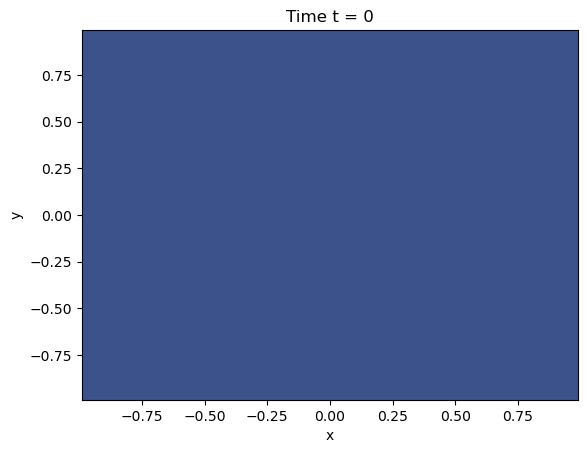

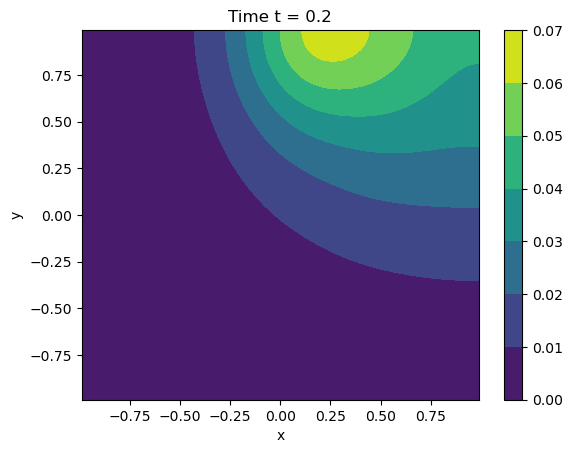

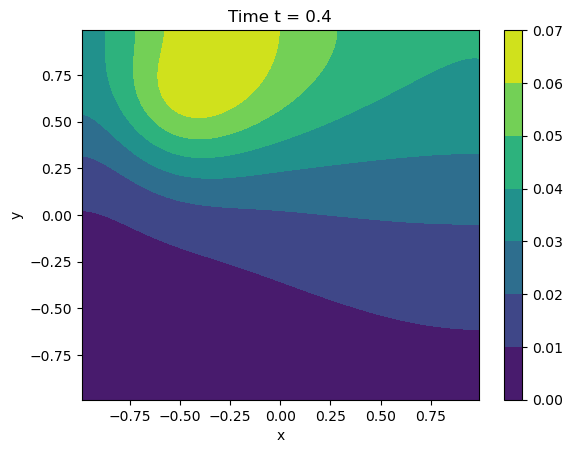

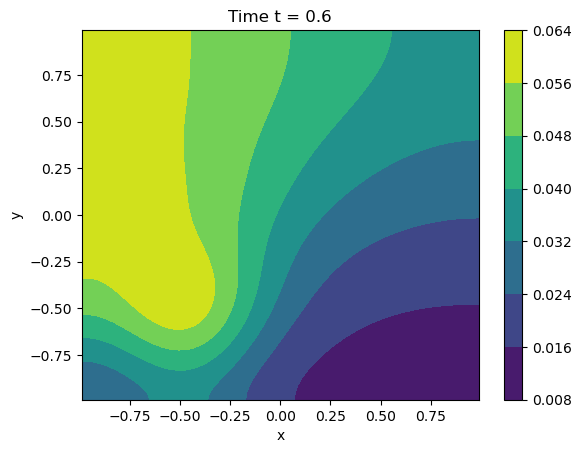

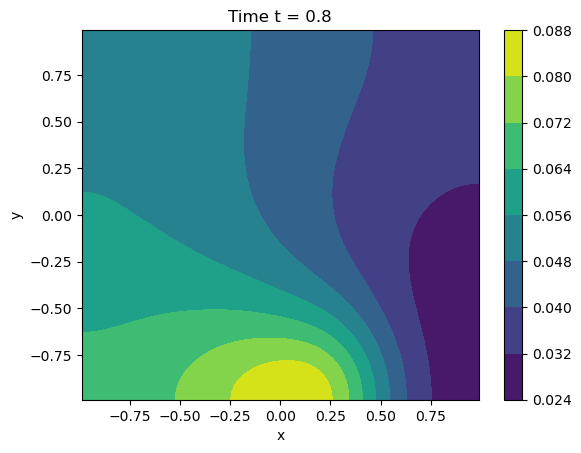

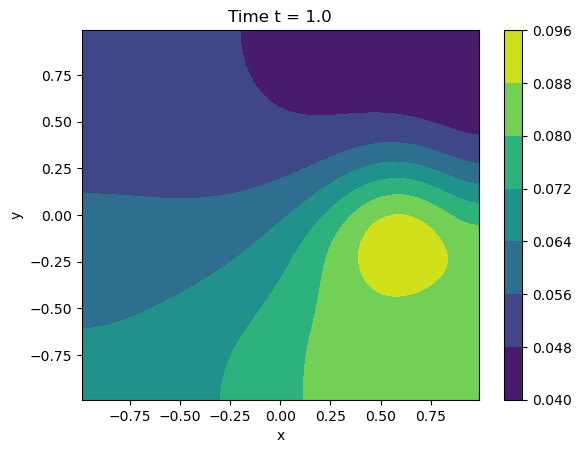

In [4]:
# Apply initial condition
u[:, :] = initial_condition(X, Y)

# Plot at specified time intervals
plt.figure()
plt.title(f"Time t = 0")
plt.contourf(u, extent=(-1, 1, -1, 1), origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Implement ADI scheme
for n in range(1, Nt + 1):

    ut = np.zeros((Nx, Ny))
    # 1st half
    for j in range(Ny):
        A = np.zeros((Nx, Ny))
        b = dt * 0.5 * source_term(x, y[j], (n - 0.5) * dt)
        for i in range(Nx):
            if j==0:
                b[i] += (1/h**2) * (-2*u[i,j] + 2*u[i,j+1]) * dt/2 + u[i,j]
            elif j==Ny-1:
                b[i] += (1/h**2) * (-2*u[i,j] + 2*u[i,j-1]) * dt/2 + u[i,j]
            else:
                b[i] += (1/h**2) * (-2*u[i,j] + u[i,j+1] + u[i,j-1]) * dt/2 + u[i,j]
                
            A[i,i] += (1 + dt/(h**2))
            if i==0:
                A[i,i+1] += -2*dt/(2*h**2)
            elif i==Ny-1:
                A[i,i-1] += -2*dt/(2*h**2)
            else:
                A[i,i+1] += -dt/(2*h**2)
                A[i,i-1] += -dt/(2*h**2)

        ut[:, j] = np.linalg.solve(A, b)

    
    # 2nd half
    for i in range(Nx):
        A = np.zeros((Nx, Ny))
        b = dt * 0.5 * source_term(x[i], y, n * dt)
        for j in range(Ny):
            if i==0:
                b[j] += (1/h**2) * (-2*ut[i,j] + 2*ut[i+1,j]) * dt/2 + ut[i,j]
            elif i==Nx-1:
                b[j] += (1/h**2) * (-2*ut[i,j] + 2*ut[i-1,j]) * dt/2 + ut[i,j]
            else:
                b[j] += (1/h**2) * (-2*ut[i,j] + ut[i+1,j] + ut[i-1,j]) * dt/2 + ut[i,j]
                
            A[j,j] += (1 + dt/(h**2))
            if j==0:
                A[j,j+1] += -2*dt/(2*h**2)
            elif j==Ny-1:
                A[j,j-1] += -2*dt/(2*h**2)
            else:
                A[j,j+1] += -dt/(2*h**2)
                A[j,j-1] += -dt/(2*h**2)

        u[i, :] = np.linalg.solve(A, b)

        
    if n%4==0:
    # Plot at specified time intervals
        plt.figure()
        plt.title(f"Time t = {n * dt :.1f}")
        plt.contourf(u.T, extent=(-1, 1, -1, 1), origin='lower')
        plt.colorbar()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
